In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import re
from pprint import pprint
from traffic_analysis import (
    display_shot,
    load_config,
    maximum_measure_points,
    get_colors_from_screenshots,
    show_points_on_screenshot,
)

In [36]:
URL_IMAGE = "./shots/leuven_tiensesteenweg_20231017-114236.png"

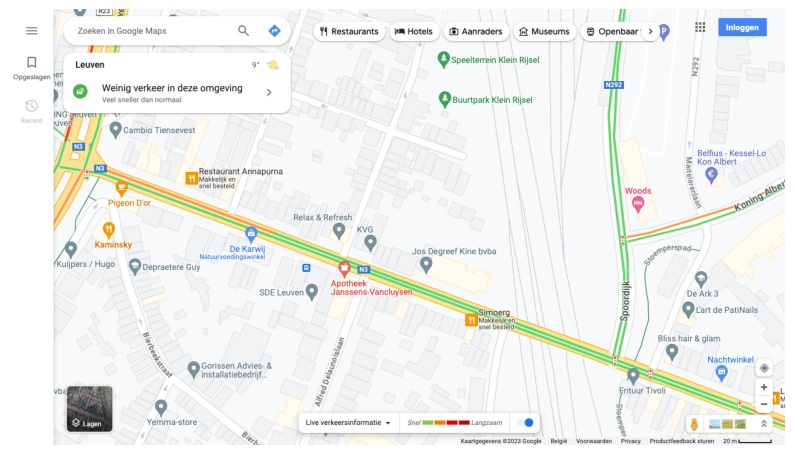

In [37]:
ax = display_shot(URL_IMAGE)
plt.show()

In [38]:
config = load_config("config.toml")

# Print the values
pprint(config)

{'leuven': {'geldenaaksepoort': {'url': 'https://www.google.com/maps/@50.8726718,4.7131464,18z/data=!5m1!1e1'},
            'tiensesteenweg': {'points_from': [[134, 269],
                                               [162, 275],
                                               [260, 312],
                                               [344, 343],
                                               [385, 358],
                                               [427, 374],
                                               [450, 382],
                                               [535, 413],
                                               [605, 439],
                                               [700, 475],
                                               [721, 483],
                                               [840, 527],
                                               [887, 545],
                                               [964, 573],
                                               [1011, 589],
  

In [39]:
streets = list(config["leuven"].keys())
streets

['geldenaaksepoort', 'tiensevest', 'tiensesteenweg', 'tiensestraat']

# Code to display four shots in a quadrant

In [40]:
mosaic = [[streets[3], streets[0]], [streets[1], streets[2]]]

In [41]:
plt.rc("axes.spines", top=False, right=False)

In [42]:
URL_IMAGE_DIR = "shots"
url_image_dir = Path(URL_IMAGE_DIR)
assert url_image_dir.exists()
location = "leuven"

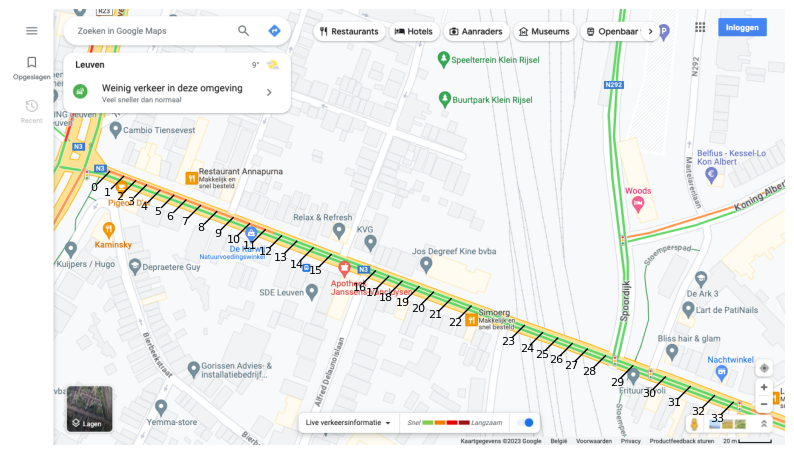

In [43]:
# Plot the points where to measure traffic flow
street = "tiensesteenweg"
direction = "to"
ax = show_points_on_screenshot(config, location, street, URL_IMAGE)

plt.savefig(
    f"meetpunten_{location}_{street}_{direction}.png",  # Set path and filename
    dpi=300,  # Set dots per inch
    bbox_inches="tight",  # Remove extra whitespace around plot
    facecolor="white",
)
plt.show()

In [44]:
# Determine the maximum point to measure points
# This number will determine the number of columns in the resulting dataframe
max_points, max_location, max_street, max_direction = maximum_measure_points(config)
print(
    f"Maximum number of measurement points is {max_points} in {max_street} in {location} in {max_direction=}"
)

Maximum number of measurement points is 18 in tiensesteenweg in leuven in max_direction='_from'


# Walk over screenshots and sample pixel colors

In [45]:
df = get_colors_from_screenshots(config, url_image_dir)

df.head()

ValueError: 94 columns passed, passed data had 174 columns

In [ ]:
df.tail()

,location,street,path,timestamp,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,...,color_32,p32_red,p32_green,p32_blue,traffic_color_32,color_33,p33_red,p33_green,p33_blue,traffic_color_33
30,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-174637.png,2023-10-17 17:46:37,"[242, 60, 50]",242,60,50,red,"[242, 60, 50]",...,"[255, 151, 77]",255,151,77,orange,"[255, 151, 77]",255,151,77,orange
21,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-175148.png,2023-10-17 17:51:48,"[242, 60, 50]",242,60,50,red,"[242, 60, 50]",...,"[242, 60, 50]",242,60,50,red,"[242, 60, 50]",242,60,50,red
36,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-175659.png,2023-10-17 17:56:59,"[242, 60, 50]",242,60,50,red,"[242, 60, 50]",...,"[255, 151, 77]",255,151,77,orange,"[255, 151, 77]",255,151,77,orange
27,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,2023-10-17 18:02:10,"[242, 60, 50]",242,60,50,red,"[242, 60, 50]",...,"[255, 151, 77]",255,151,77,orange,"[255, 151, 77]",255,151,77,orange
9,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180722.png,2023-10-17 18:07:22,"[242, 60, 50]",242,60,50,red,"[242, 60, 50]",...,"[99, 214, 104]",99,214,104,grey,"[99, 214, 104]",99,214,104,grey


## Inspect the dataframe

In [ ]:
df["color_0"].astype(str).unique()

array(['[255 151  77]', '[253 226 147]', '[129  31  31]', '[242  60  50]'],
      dtype=object)

In [ ]:
df["color_0"].astype(str).value_counts()

color_0
[129  31  31]    19
[255 151  77]    11
[242  60  50]     7
[253 226 147]     2
Name: count, dtype: int64

## Display all colors that are found in the dataframe at a certain point

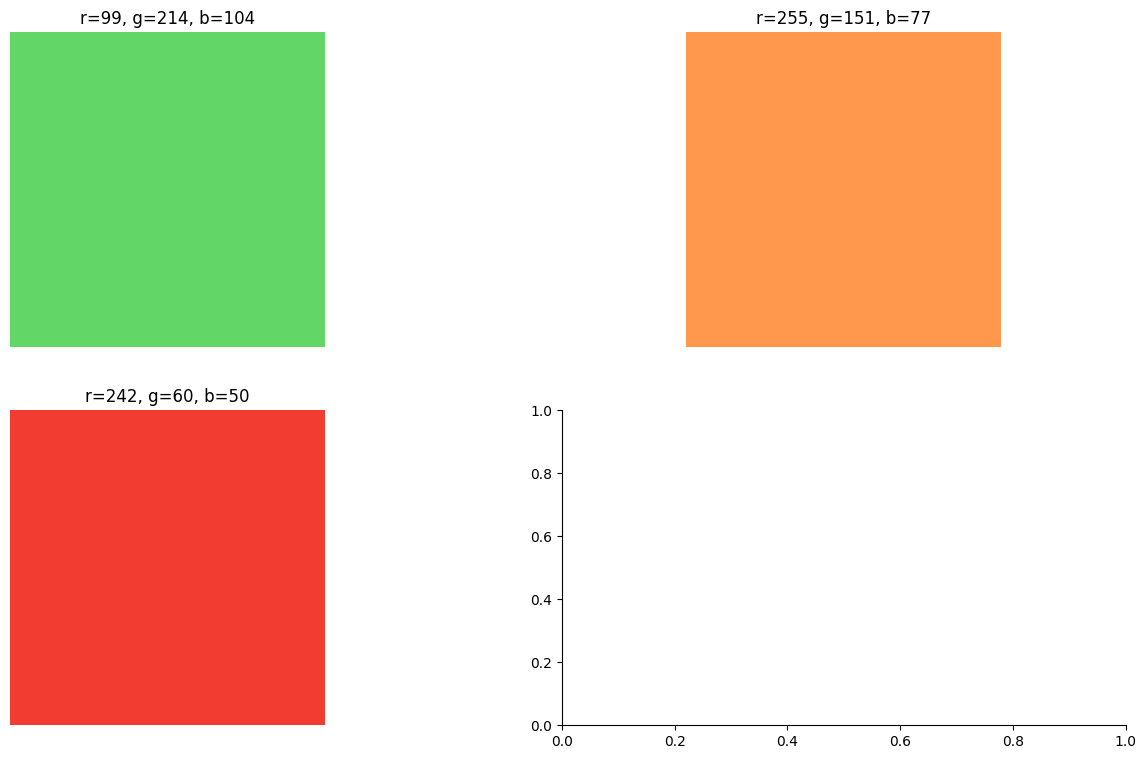

In [ ]:
fig, axd = plt.subplot_mosaic(
    mosaic, gridspec_kw={"width_ratios": [1, 1], "wspace": 0.2}, figsize=(16, 9)
)
colors_in_measure_point = "color_13"
number_of_colors = df[colors_in_measure_point].astype(str).nunique()
assert number_of_colors < len(
    fig.axes
), "Increase the number of axis {len(fig.axes)} to at least {number_of_colors=}"
for idx, (color, ax) in enumerate(
    zip(df[colors_in_measure_point].astype(str).unique(), fig.axes)
):
    parts = " ".join(color.split()).split(" ")
    numbers = re.findall(r"\d+", color)
    # print (numbers[0], numbers[1], numbers[2])
    r = int(numbers[0])
    g = int(numbers[1])
    b = int(numbers[2])
    ax.set_axis_off()
    if idx < number_of_colors:
        ax.imshow([[(r, g, b)]])
        ax.set_title(f"{r=}, {g=}, {b=}")

# Analyse/resample the data and make plot

In [ ]:
df = df.sort_values(by="timestamp").reset_index(drop=True).copy()

In [ ]:
df["street"].shape

(39,)

In [ ]:
df_resampled = df.set_index("timestamp").resample("1Min").ffill()

In [ ]:
df_resampled

,location,street,path,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,p1_red,...,color_32,p32_red,p32_green,p32_blue,traffic_color_32,color_33,p33_red,p33_green,p33_blue,traffic_color_33
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 11:42:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-17 11:43:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:44:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:45:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:46:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,red,"[242, 60, 50]",242.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,red,"[242, 60, 50]",242.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,red,"[242, 60, 50]",242.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange


In [ ]:
df_resampled = df_resampled.reset_index().iloc[1:].set_index("timestamp")
df_resampled.head()

,location,street,path,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,p1_red,...,color_32,p32_red,p32_green,p32_blue,traffic_color_32,color_33,p33_red,p33_green,p33_blue,traffic_color_33
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 11:43:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:44:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:45:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114236.png,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:46:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey
2023-10-17 11:47:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-114540.png,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,...,"[99, 214, 104]",99.0,214.0,104.0,grey,"[99, 214, 104]",99.0,214.0,104.0,grey


## Analyse tiensesteenweg

In [ ]:
df_street = df_resampled.query("(street == 'tiensesteenweg')")
df_street = df_street[df_street.index > "2023-10-17 15:29:00"]

In [ ]:
df_street

,location,street,path,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,p1_red,...,color_32,p32_red,p32_green,p32_blue,traffic_color_32,color_33,p33_red,p33_green,p33_blue,traffic_color_33
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 15:30:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,darkred,"[129, 31, 31]",129.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange
2023-10-17 15:31:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,darkred,"[129, 31, 31]",129.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange
2023-10-17 15:32:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,darkred,"[129, 31, 31]",129.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange
2023-10-17 15:33:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,darkred,"[129, 31, 31]",129.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange
2023-10-17 15:34:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,darkred,"[129, 31, 31]",129.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,red,"[242, 60, 50]",242.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,red,"[242, 60, 50]",242.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,red,"[242, 60, 50]",242.0,...,"[255, 151, 77]",255.0,151.0,77.0,orange,"[255, 151, 77]",255.0,151.0,77.0,orange


### Ascii bar plot

In [ ]:
# All column names
# ",".join(df_street.columns)

In [ ]:
print_map = {"darkred": "*", "red": "x", "orange": "-", "green": "."}

In [ ]:
df_street["traffic_color_19"].unique()

array(['red', 'orange', 'grey'], dtype=object)

In [ ]:
for idx, row in df_street.iterrows():
    print(idx, end="")
    for i in range(34):
        symbol = print_map.get(row[f"traffic_color_{i}"], ".")
        print(symbol, end="")
    print("\n")

2023-10-17 15:30:00************xxxxxxxxx........-.---

2023-10-17 15:31:00************xxxxxxxxx........-.---

2023-10-17 15:32:00************xxxxxxxxx........-.---

2023-10-17 15:33:00************xxxxxxxxx........-.---

2023-10-17 15:34:00************xxxxxxxxx........-.---

2023-10-17 15:35:00************xxxxxxxxx........-.---

2023-10-17 15:36:00************xxxxxxxxx........-.---

2023-10-17 15:37:00************xxxxxxxxx........-.---

2023-10-17 15:38:00************xxxxxxxxx........-.---

2023-10-17 15:39:00************xxxxxxxxx........-.---

2023-10-17 15:40:00************xxxxxxxxx........-.---

2023-10-17 15:41:00************xxxxxxxxx........-.---

2023-10-17 15:42:00************xxxxxxxxx........-.---

2023-10-17 15:43:00************xxxxxxxxx--------.....

2023-10-17 15:44:00************xxxxxxxxx--------.....

2023-10-17 15:45:00************xxxxxxxxx--------.....

2023-10-17 15:46:00************xxxxxxxxx--------.....

2023-10-17 15:47:00************xxxxxxxxx--------.....

2023-10-17

### matplotlib

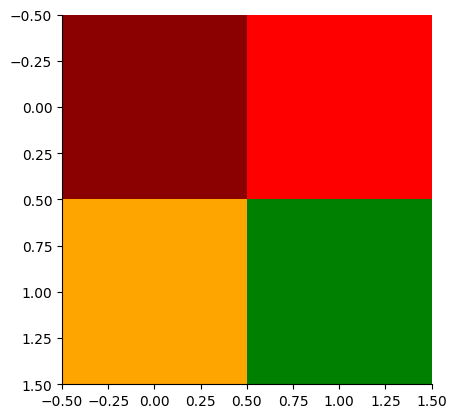

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["darkred", "red", "orange", "green"]
cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

plt.imshow([[0, 1], [2, 3]], cmap=cmap)
plt.show()

In [ ]:
df_street.shape

(158, 173)

In [ ]:
color_columns = [f"traffic_color_{i}" for i in range(34)]
color2index = {"darkred": 0, "red": 1, "orange": 2, "green": 3}
index_columns = []
for idx, colom in enumerate(color_columns):
    df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
    index_columns.append(f"index_color_{idx}")
traffic_color_matrix = df_street[index_columns].fillna(3).to_numpy()
traffic_color_matrix

/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_96130/2116354483.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_96130/2116354483.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_street[f"index_color_{idx}"] = df_street[colom].map(color2index)
/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_96130/2116354483.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is

array([[0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

In [ ]:
traffic_color_matrix.shape

(158, 34)

In [ ]:
from matplotlib.text import Text
import matplotlib.dates as mdates

In [ ]:
time = df_street.index

In [ ]:
traffic_color_matrix.shape

(158, 34)

/var/folders/l3/cl401yld1x3f35c0g3sbm3b80000gp/T/ipykernel_96130/542747038.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels)


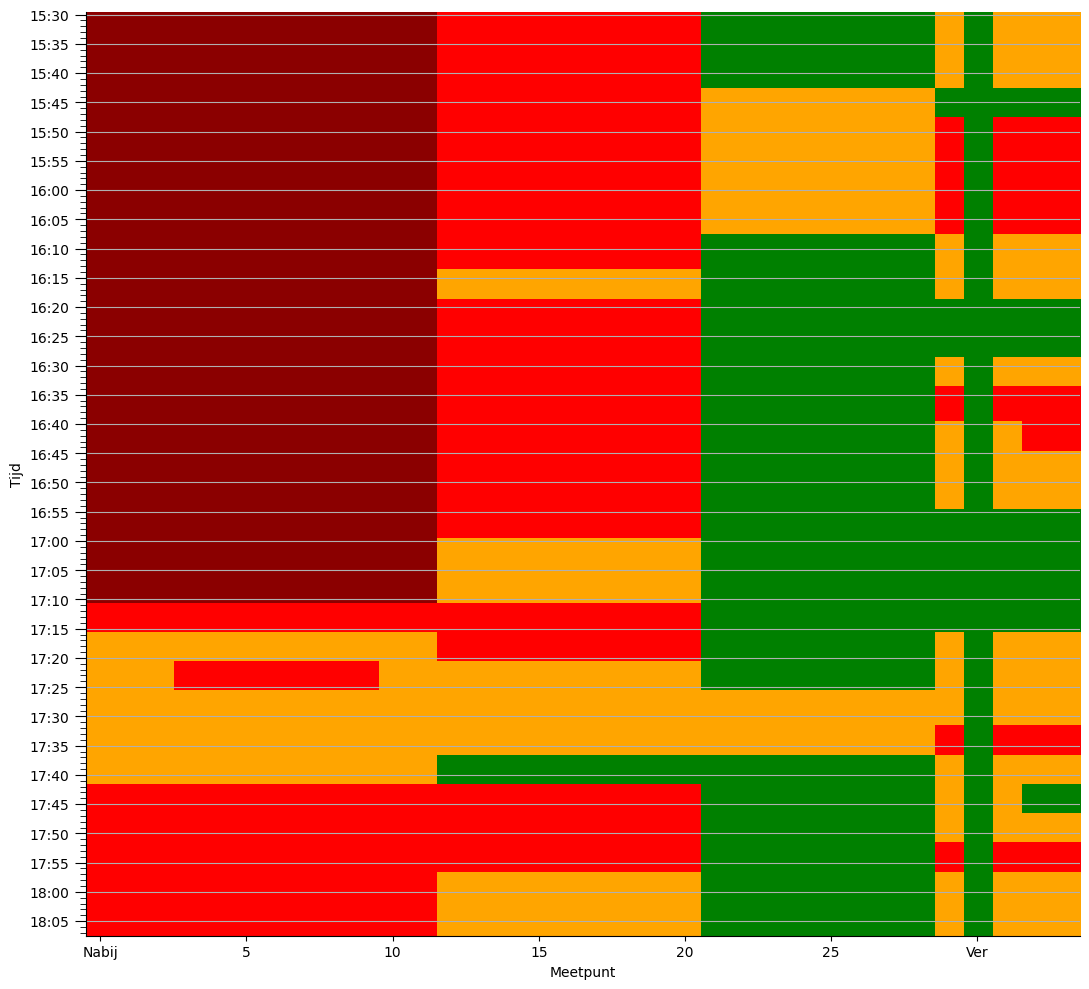

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))
# plt.figure().set_figheight(1)
# plt.figure().set_figwidth(10)

# plt.axis('off');
ax.set_xlabel("Meetpunt")
ax.set_ylabel("Tijd")
# ax.set_xticks([]);
# ax.set_yticks([]);


# # Calculate the number of minutes between each tick
# minutes_per_tick = 1

# # Calculate the total number of ticks based on the number of rows
# num_ticks = len(traffic_color_matrix)

# # Create an array of tick locations
# tick_locations = np.arange(0, num_ticks, minutes_per_tick)

# Create an array of tick labels (assuming they are in minutes)
# tick_labels = [str(i * minutes_per_tick) for i in range(len(tick_locations))]
ticks = df_street.index
tick_labels = [
    f"{tick:%H:%M}" if idx % 5 == 0 else "" for idx, tick in enumerate(ticks)
]
major_tick_labels = [f"{tick:%H:%M}" for idx, tick in enumerate(ticks) if idx % 5 == 0]

# Plot the matrix using imshow on the specified axis
ax.imshow(traffic_color_matrix, cmap=cmap, aspect=0.2)

# Set y-axis tick locations and labels
ax.set_yticks(list(range(df_street.shape[0])), minor=True)
ax.set_yticks(list(range(0, df_street.shape[0], 5)), minor=False)
ax.set_yticklabels(major_tick_labels, minor=False)

# # Remove values for minor tick labels
# minor_labels = ['' for _ in ax.get_yticks(minor=True)]
# ax.set_yticklabels(minor_labels, minor=True)

# # Set the major locator and formatter for y-axis
# ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # Set major ticks every 5 minutes
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format major ticks as HH:MM

# Set the minor locator and formatter for y-axis
# ax.yaxis.set_minor_locator(mdates.MinuteLocator(interval=1))  # Set minor ticks every 1 minute
# ax.yaxis.set_minor_formatter(mdates.DateFormatter('%M'))  # Format minor ticks as minutes


# Customize tick parameters to make major ticks longer
ax.tick_params(axis="y", which="major", size=8)  # Adjust the size as needed
ax.tick_params(axis="y", which="minor", size=4)

# Add gridlines for the y-axis at major y-tick positions
ax.yaxis.grid(True, which="major")

# Hide gridlines for the x-axis
ax.xaxis.grid(False)

# # Remove y-labels for the minor ticks
# ax.set_yticklabels([], minor=True)

# # Set the x-axis major locator to every 15 minutes
# ax.yaxis.set_major_locator(mdates.MinuteLocator(interval=15))
# # Format the x-axis major ticks as hours and minutes
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ylabels = ax.get_yticklabels()
# for idx, label in enumerate(ylabels):
#     ylabels[idx].set_text('')
#     if idx == 1:
#         ylabels[1].set_text('16u')
#     if idx == len(ylabels)-2:
#         ylabels[-2].set_text('18u')
# ax.set_yticklabels(ylabels);
xlabels = ax.get_xticklabels()
for idx, label in enumerate(xlabels):
    # xlabels[idx].set_text('')
    if idx == 1:
        xlabels[1].set_text("Nabij")
    if idx == len(xlabels) - 1:
        xlabels[-2].set_text("Ver")
ax.set_xticklabels(xlabels)


plt.savefig(
    f"leuven_tiensesteenweg_231017_16u_18u_{direction}.png",  # Set path and filename
    dpi=300,  # Set dots per inch
    bbox_inches="tight",  # Remove extra whitespace around plot
    facecolor="white",
)  # Set background color to white

In [ ]:
df_street

,location,street,path,color_0,p0_red,p0_green,p0_blue,traffic_color_0,color_1,p1_red,...,index_color_24,index_color_25,index_color_26,index_color_27,index_color_28,index_color_29,index_color_30,index_color_31,index_color_32,index_color_33
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-10-17 15:30:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,darkred,"[129, 31, 31]",129.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 15:31:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,darkred,"[129, 31, 31]",129.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 15:32:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,darkred,"[129, 31, 31]",129.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 15:33:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,darkred,"[129, 31, 31]",129.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 15:34:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-125500.png,"[129, 31, 31]",129.0,31.0,31.0,darkred,"[129, 31, 31]",129.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17 18:03:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,red,"[242, 60, 50]",242.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 18:04:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,red,"[242, 60, 50]",242.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
2023-10-17 18:05:00,leuven,tiensesteenweg,shots/leuven_tiensesteenweg_20231017-180210.png,"[242, 60, 50]",242.0,60.0,50.0,red,"[242, 60, 50]",242.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0
